# 3. Machine-Learning Models

## Linear Regression, Random Forest Regression, Gradient Boosting Machine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('combined_df_cleaned1.csv')
df.head()

,Country name,Year,GDP,GDP Per Capita,Population Growth Rate_y,GDP Growth Rate,Population aged 65 and older,Total Dependency Ratio,Child Dependency Ratio,Elderly Dependency Ratio,...,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years,Dependency Ratio,Percent_expenditure_education,healthcare_expenditure
0,Afghanistan,2006,8.399,330.111144,4.226544,14.913121,585796,1.063262,1.015758,0.047504,...,1654321,1043980,631641,266723,53964,3254,94.0,101.575764,4.684761,10.622766
1,Afghanistan,2007,9.892,381.881757,1.809382,17.775926,597262,1.083382,1.035345,0.048037,...,1679259,1053907,647232,273486,54541,2286,83.0,103.534461,4.174895,9.904675
2,Afghanistan,2008,11.513,435.649568,2.022514,16.386979,612488,1.092405,1.043910,0.048494,...,1712803,1069373,663147,281355,55901,1831,75.0,104.391015,4.383672,10.256495
3,Afghanistan,2009,13.318,486.319125,3.625454,15.677929,639528,1.068458,1.020154,0.048305,...,1791500,1106513,685796,293032,59609,2388,80.0,102.015351,4.810640,9.818487
4,Afghanistan,2010,15.406,546.512212,2.937202,15.678030,663426,1.054334,1.005987,0.048347,...,1856373,1142218,702472,302999,62335,2353,53.0,100.598672,3.479450,8.569672


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                2264 non-null   object 
 1   Year                                        2264 non-null   int64  
 2   GDP                                         2264 non-null   float64
 3   GDP Per Capita                              2264 non-null   float64
 4   Population Growth Rate_y                    2264 non-null   float64
 5   GDP Growth Rate                             2264 non-null   float64
 6   Population aged 65 and older                2264 non-null   int64  
 7   Total Dependency Ratio                      2264 non-null   float64
 8   Child Dependency Ratio                      2264 non-null   float64
 9   Elderly Dependency Ratio                    2264 non-null   float64
 10  TDR Growth R

## We will be looking at Total Dependency Ratio, Child Dependency Ratio, Elderly Dependency Ratio to identify possible indicators that might predict the shift of these demographics

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

### Linear Regression Model

In [72]:
def predict_dependency_ratio(dependency_ratio_name, data):
    """
    Predicts a specified dependency ratio using linear regression.
    
    Parameters:
        dependency_ratio_name (str): The name of the dependency ratio to predict (e.g., 'CDR', 'EDR', 'TDR').
        data (DataFrame): The DataFrame containing the data.
    
    Returns:
        tuple: A tuple containing the model, X_test, y_test, y_pred, MAE, and RMSE.
    """
    
    # Define the feature columns to use for prediction
    feature_columns = [
        'GDP', 'GDP Growth Rate', 'GDP Per Capita', 'Population','Population Growth Rate_y',
        'Percent_expenditure_education', 'healthcare_expenditure'
    ]
    
    # Remove any rows with NaN values
    data = data.dropna(subset=feature_columns + [dependency_ratio_name])
    
    # Define the features (X) and the target (y)
    X = data[feature_columns]
    y = data[dependency_ratio_name]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return model, X_test, y_test, y_pred, mae, rmse

### predicting Child Dependency Ratio and Elderly Dependency Ratio

In [73]:
cdr_model, cdr_X_test, cdr_y_test, cdr_y_pred, cdr_mae, cdr_rmse = predict_dependency_ratio('Child Dependency Ratio', df)

print(f'Child Dependency Ratio - MAE: {cdr_mae}, RMSE: {cdr_rmse}')

edr_model, edr_X_test, edr_y_test, edr_y_pred, edr_mae, edr_rmse = predict_dependency_ratio('Elderly Dependency Ratio', df)

print(f'Elderly Dependency Ratio - MAE: {edr_mae}, RMSE: {edr_rmse}')

Child Dependency Ratio - MAE: 0.11418516522975573, RMSE: 0.15852448234067232
Elderly Dependency Ratio - MAE: 0.03412719120218338, RMSE: 0.04611061323679322


## Further model accuracy testing:

#### Child Dependency Ratio R2 scores

In [74]:
# Calculate R-squared
r2 = r2_score(cdr_y_test, cdr_y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = cdr_X_test.shape[0]  # number of observations
p = cdr_X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.5606208877493624
Adjusted R-squared: 0.5537093062083411


#### Plotting Child Dependency Ratio

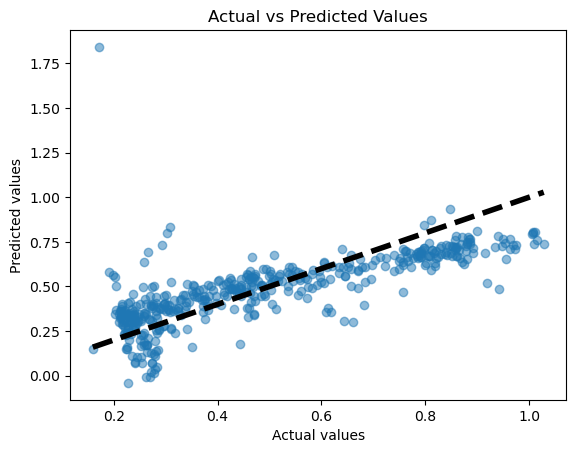

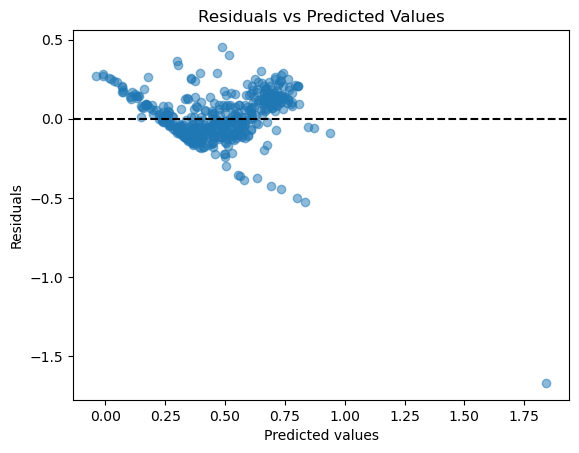

In [77]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(cdr_y_test, cdr_y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([cdr_y_test.min(), cdr_y_test.max()], [cdr_y_test.min(), cdr_y_test.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.show()

# Plot of residuals
residuals = cdr_y_test - cdr_y_pred
plt.scatter(cdr_y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

#### Elderly Dependency Ratio R2 scores

In [76]:
r2 = r2_score(edr_y_test, edr_y_pred)
print(f'R-squared: {r2}')

n = edr_X_test.shape[0]  
p = edr_X_test.shape[1]  
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.6995840293349431
Adjusted R-squared: 0.6948583848525715


#### Plotting Elderly Dependency Ratio

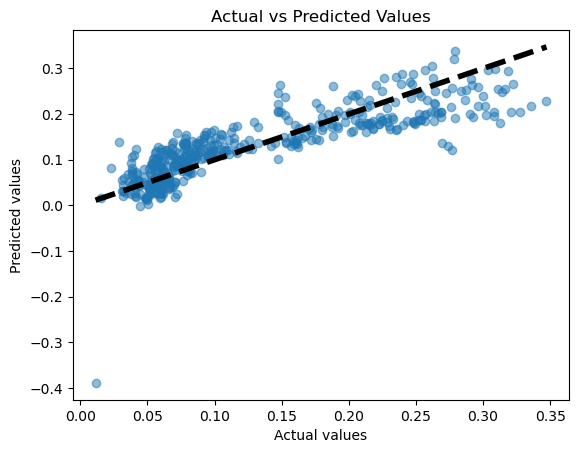

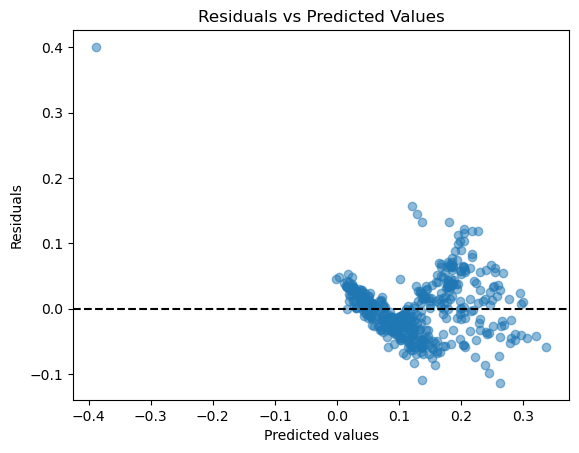

In [78]:
# Scatter plot of actual vs predicted values
plt.scatter(edr_y_test, edr_y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([edr_y_test.min(), edr_y_test.max()], [edr_y_test.min(), edr_y_test.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.show()

# Plot of residuals
residuals = edr_y_test - edr_y_pred
plt.scatter(edr_y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

## It is apparent that due to the Residuals vs Predicted values exhibiting a pattern, Linreg model does not capture all the underlying trends or relationships.

## Hence we will try other models.

### Using random forest, it chooses the best feature based on its importance. By retrieving the best features, it can better fit the random forest regression model.

In [79]:
def get_features(y):
    X = df[['Population', 'GDP', 'GDP Per Capita', 'Population Growth Rate_y', 'GDP Growth Rate', 
            'Percent_expenditure_education', 'healthcare_expenditure']]
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    
    importances = rf_model.feature_importances_
    
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    return feature_importance_df

In [80]:
def train_and_evaluate_model(model, X, y):
    
    """
    Trains the model and evaluates it on the test set.
    
    Parameters:
        model (sklearn estimator): The machine learning model to train.
        X (DataFrame): The feature data.
        y (Series): The target data.
        
    Returns:
        dict: A dictionary containing the model, predictions, and performance metrics.
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.title('Actual vs Predicted Values')
    plt.show()
    
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.show()
    
    return{
        'model': model,
        'X_test': X_test,
        'y_test': y_test,
        'y_pred': y_pred,
        'RMSE': rmse,
        'MAE': mae
    }

In [81]:
# Total Dependency Ratio test
y = df['Total Dependency Ratio']
X = get_features(y)
print(X)
top_features = X.head(5)['Feature'].tolist()
X = df[top_features]
print(top_features)

                         Feature  Importance
2                 GDP Per Capita    0.640157
3       Population Growth Rate_y    0.234655
0                     Population    0.040259
6         healthcare_expenditure    0.032072
5  Percent_expenditure_education    0.024300
1                            GDP    0.022157
4                GDP Growth Rate    0.006401
['GDP Per Capita', 'Population Growth Rate_y', 'Population', 'healthcare_expenditure', 'Percent_expenditure_education']


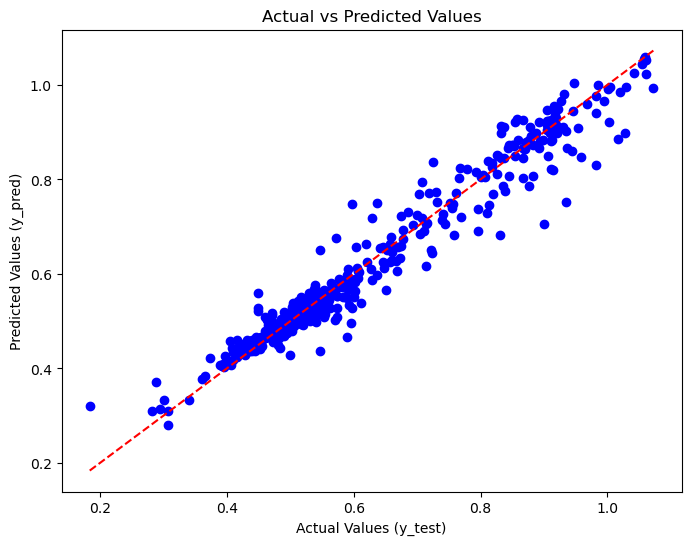

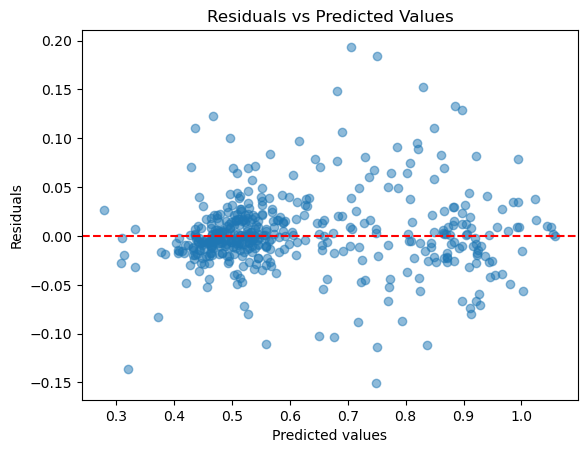

Random Forest - RMSE: 0.03933987875507425, MAE: 0.02565656669033112
R-squared: 0.9538390332140857
Adjusted R-squared: 0.9533226913037287


In [83]:
results = train_and_evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), X, y)
print(f'Random Forest - RMSE: {results["RMSE"]}, MAE: {results["MAE"]}')
r2 = r2_score(results["y_test"], results["y_pred"])
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = results["X_test"].shape[0]  # number of observations
p = results["X_test"].shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

                         Feature  Importance
3       Population Growth Rate_y    0.404396
2                 GDP Per Capita    0.327210
6         healthcare_expenditure    0.146020
1                            GDP    0.065794
0                     Population    0.032175
5  Percent_expenditure_education    0.018591
4                GDP Growth Rate    0.005814


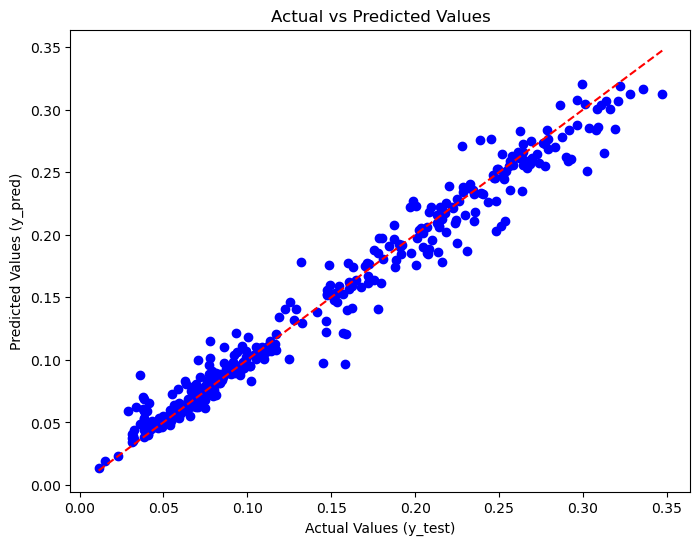

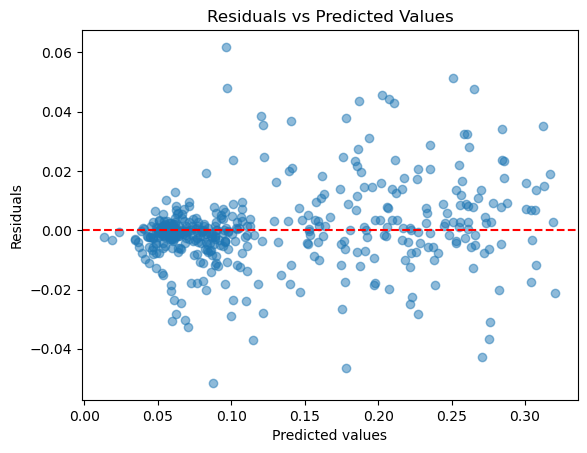

Random Forest - RMSE: 0.013403641098646944, MAE: 0.008398591583355411
R-squared: 0.9746156059004726
Adjusted R-squared: 0.9743316641320214


In [84]:
# Elderly Deoendency Ratio test
y = df['Elderly Dependency Ratio']
X = get_features(y)
print(X)
top_features = X.head(5)['Feature'].tolist()
X = df[top_features]

results = train_and_evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), X, y)
print(f'Random Forest - RMSE: {results["RMSE"]}, MAE: {results["MAE"]}')
r2 = r2_score(results["y_test"], results["y_pred"])
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = results["X_test"].shape[0]  # number of observations
p = results["X_test"].shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

                         Feature  Importance
2                 GDP Per Capita    0.697002
3       Population Growth Rate_y    0.222829
0                     Population    0.023727
6         healthcare_expenditure    0.020395
1                            GDP    0.017158
5  Percent_expenditure_education    0.014642
4                GDP Growth Rate    0.004247


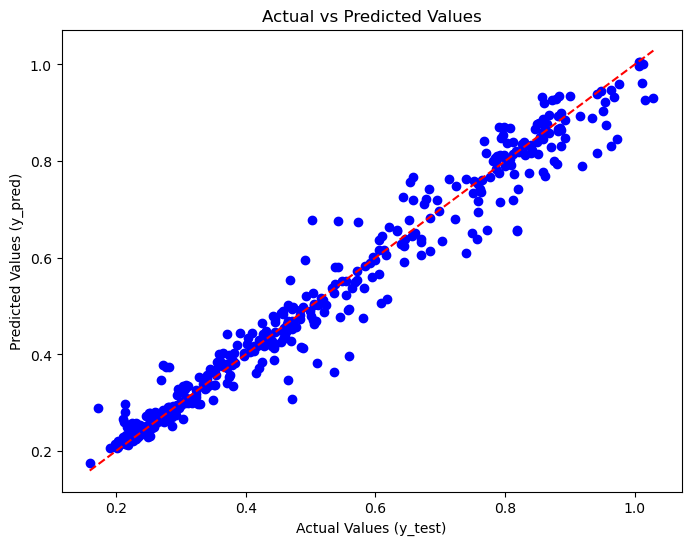

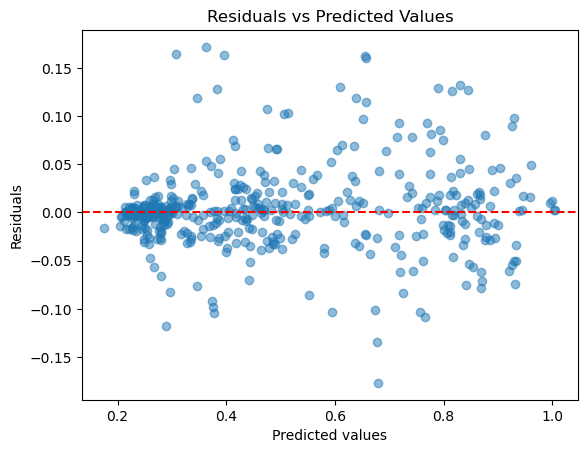

Random Forest - RMSE: 0.0425243566286204, MAE: 0.026766978196048577
R-squared: 0.9683828861520053
Adjusted R-squared: 0.968029227160417


In [85]:
# Child Dependency Ratio test
y = df['Child Dependency Ratio']
X = get_features(y)
print(X)
top_features = X.head(5)['Feature'].tolist()
X = df[top_features]

results = train_and_evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), X, y)
print(f'Random Forest - RMSE: {results["RMSE"]}, MAE: {results["MAE"]}')
r2 = r2_score(results["y_test"], results["y_pred"])
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = results["X_test"].shape[0]  # number of observations
p = results["X_test"].shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

### Making Use of Gradient Boosting Machine to predict using the features

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

def train_and_evaluate_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.title('Actual vs Predicted Values')
    plt.show()
    
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.show()
    
    return {
        'model': model,
        'X_test': X_test,
        'y_test': y_test,
        'y_pred': y_pred,
        'RMSE': rmse,
        'MAE': mae
    }

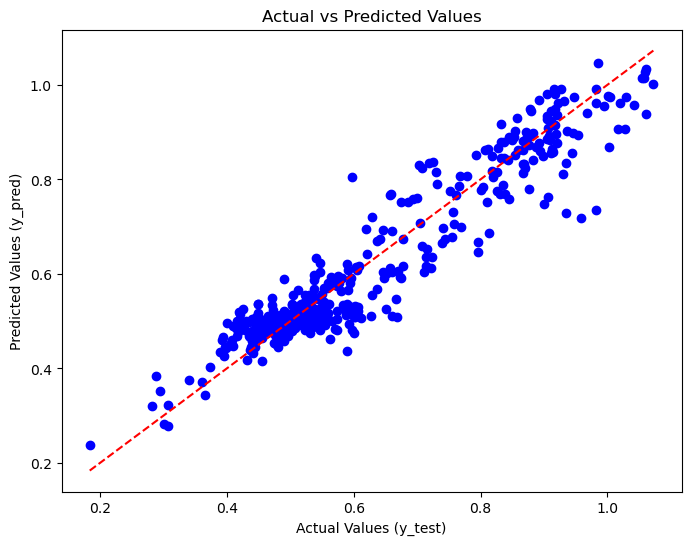

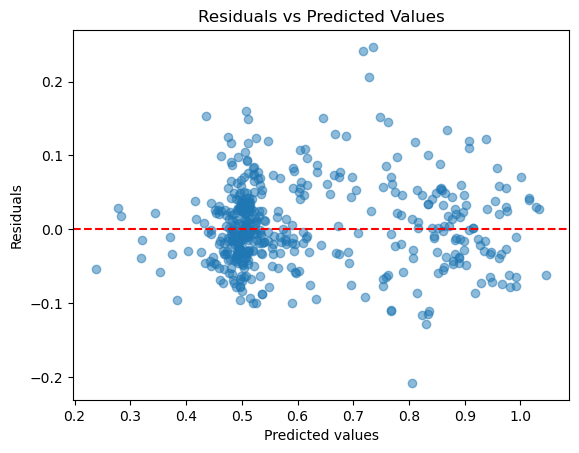

Gradient Boosting Machine - RMSE: 0.057261736268472335, MAE: 0.043799925294162385
R-squared: 0.9683828861520053
Adjusted R-squared: 0.968029227160417


In [87]:
# Total Dependency Ratio test
y = df['Total Dependency Ratio']
X = get_features(y)
top_features = X.head(5)['Feature'].tolist()
X = df[top_features]

gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

results_gbm = train_and_evaluate_model(gbm_model, X, y)
print(f'Gradient Boosting Machine - RMSE: {results_gbm["RMSE"]}, MAE: {results_gbm["MAE"]}')
r2 = r2_score(results["y_test"], results["y_pred"])
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = results["X_test"].shape[0]  # number of observations
p = results["X_test"].shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

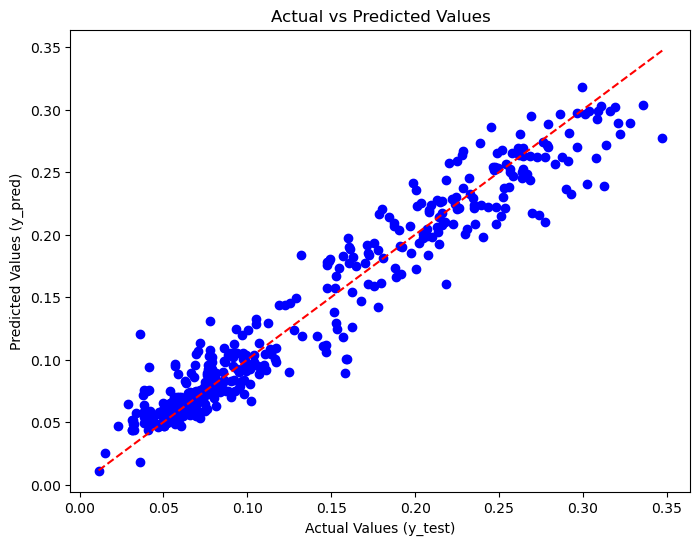

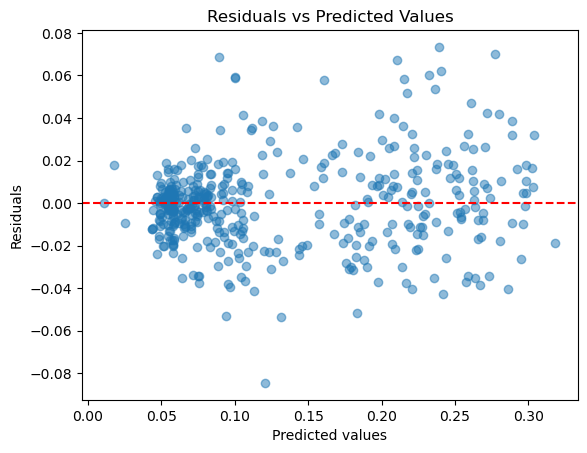

Gradient Boosting Machine - RMSE: 0.020286203186406025, MAE: 0.014629126106155577
R-squared: 0.9683828861520053
Adjusted R-squared: 0.968029227160417


In [88]:
# Elderly Dependency Ratio test
y = df['Elderly Dependency Ratio']
X = get_features(y)
top_features = X.head(5)['Feature'].tolist()
X = df[top_features]

gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

results_gbm = train_and_evaluate_model(gbm_model, X, y)
print(f'Gradient Boosting Machine - RMSE: {results_gbm["RMSE"]}, MAE: {results_gbm["MAE"]}')
r2 = r2_score(results["y_test"], results["y_pred"])
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = results["X_test"].shape[0]  # number of observations
p = results["X_test"].shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

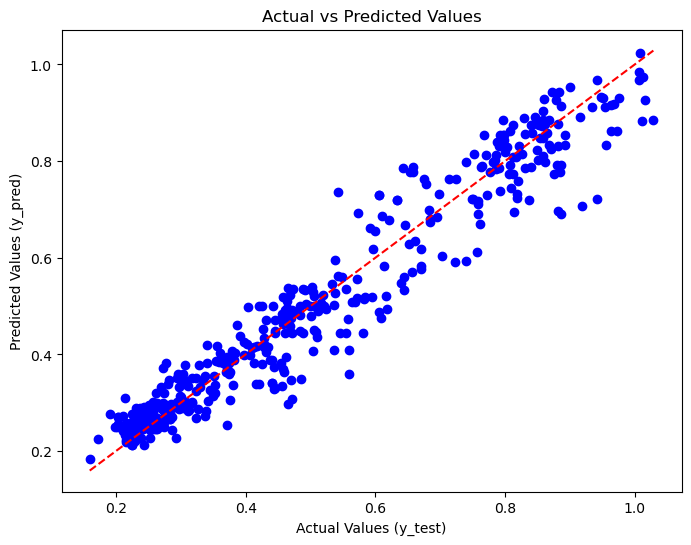

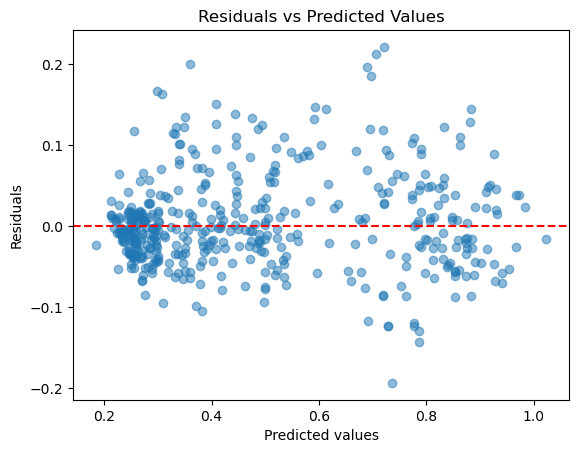

Gradient Boosting Machine - RMSE: 0.058745287534587805, MAE: 0.043428903038097114
R-squared: 0.9683828861520053
Adjusted R-squared: 0.968029227160417


In [89]:
# Child Dependency Ratio test
y = df['Child Dependency Ratio']
X = get_features(y)
top_features = X.head(5)['Feature'].tolist()
X = df[top_features]

gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

results_gbm = train_and_evaluate_model(gbm_model, X, y)
print(f'Gradient Boosting Machine - RMSE: {results_gbm["RMSE"]}, MAE: {results_gbm["MAE"]}')
r2 = r2_score(results["y_test"], results["y_pred"])
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = results["X_test"].shape[0]  # number of observations
p = results["X_test"].shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

### Overall, we feel that Random Forest Regression still brings the best results even though random forest regression only has a slight deviation of errors comparing to Gradient Boosting Machine. Linreg gave the due to its higher MSE or RMSE and lower R^2 score comparing to the other 2 ML model. Furthermore, the residual vs predicted values graph does not follow a pattern for Random Forest and Gradient Boosting, in comparison to Linreg graph which follows a pattern.
### Looking at Random Forest and Gradient Boosting, we feel that Random Forest is a better model, even though the difference in R^2 score and MSE or RMSE is quite small. The ability to rank the importance of features, using Random Forest, helps to increase its utility as a ML model. Not only that, we also feel that the residual vs predicted graph for Random Forest is more random as compared to Gradient Boosting, making it more credible. We feel that Gradient Boosting Machine was able to achieve such great result was due to the efficiency of features, selected by Random Forest, preventing it from overfitting. Hence, we feel that random forest is the better model.

### The machine-learning model also helps us to identify the best features for each demographics, which enables potential policy-makers, who is viewing the data, to identify likely indicators in the future which might cause a shift in that particular demographics. This helps to satisfy our initial problem statement, while also forecasting likely population growth rate.